In [31]:
%matplotlib inline
%reload_ext Cython
from __future__ import print_function
font = {'family' : 'sans-serif',
        'style': 'normal',
        'weight' : 'medium',
        'size' : 8}
import matplotlib
matplotlib.rc('font', **font)
import os
import time
import pylab
import numpy as np
from numpy import int16, uint16, uint8, float16, log2
import pickle
import glob

import cv2
from cv2 import cvtColor as convertColor, COLOR_BGR2GRAY, COLOR_GRAY2RGB,\
                resize, imread, imwrite

import pyximport; pyximport.install()

from pydvs.decode_spikes import *
# from pydvs.generate_spikes import *


def render_frame(img_w, spikes_lists):
    data_shift = uint8(numpy.log2(img_w))
    up_down_shift = uint8(2*data_shift)
    data_mask = uint8(img_w - 1)
    red = [1., 0., 0.]
    green = [0., 1., 0.]
    img = np.zeros((img_w, img_w, 3))
    w = 1.
    for spk_list in spikes_lists:
        
        for key in spk_list:
            row, col, sign = key_to_spike(key, up_down_shift, data_shift, data_mask)
            img[row, col, :] = green if sign == 1 else red
            img[row, col, :] *= w
#         w -= 0.2
    
    return img


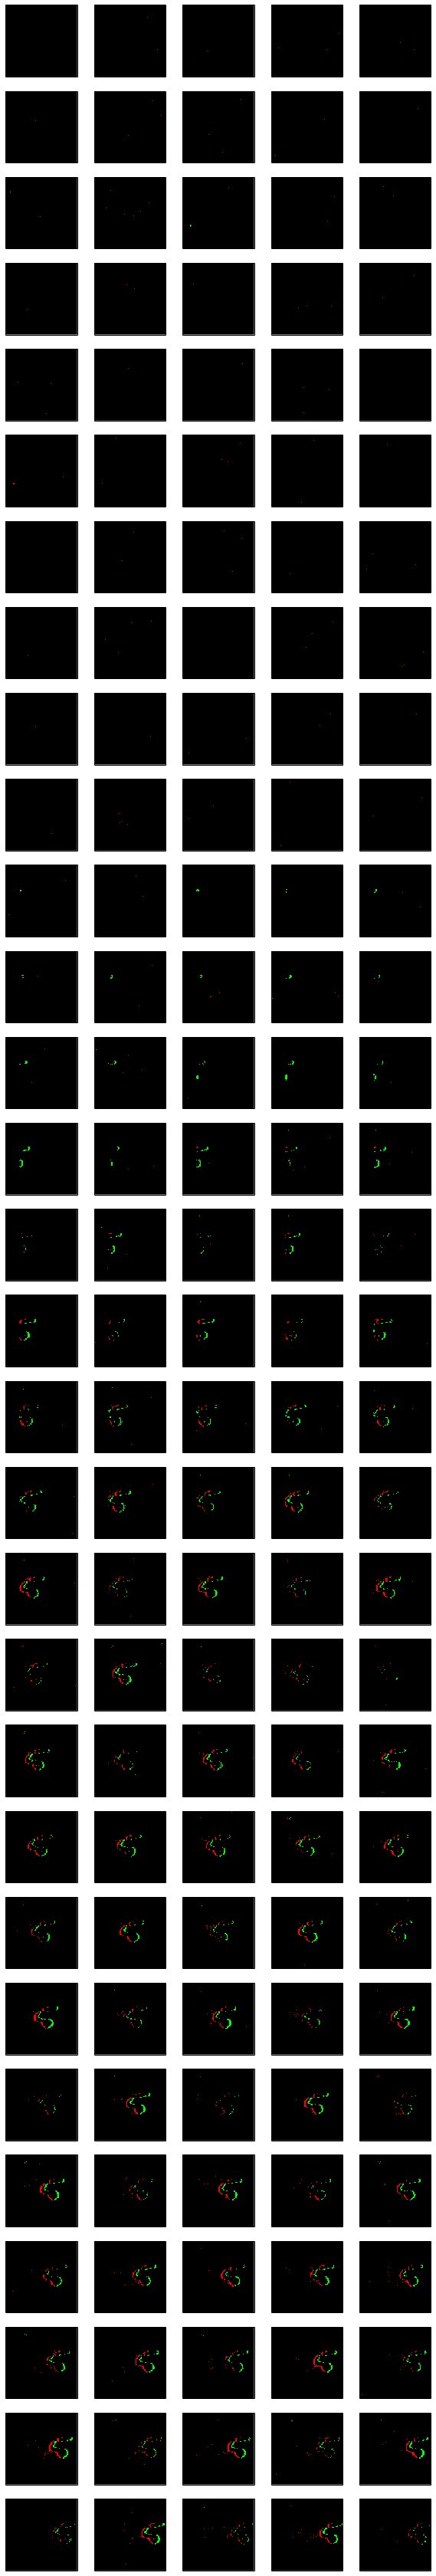

In [32]:


spikes_dir = './recorded_spikes'
spikes_recordings = glob.glob(os.path.join(spikes_dir, "*.pickle"))
spikes_recordings.sort()
img_w = 128
channels = 3
img = np.zeros((img_w, img_w, channels))

start_frame = 250
nframes = 150
end_frame = start_frame + nframes
ncols = 5
nrows = nframes//ncols + 1


# fig = pylab.figure(figsize=(ncols*3.4, nrows*3.4))
fig_w = 2
fig = pylab.figure(figsize=(ncols*fig_w, nrows*fig_w))
i = 1
for spks in spikes_recordings[start_frame:end_frame]:
    spikes_lists = pickle.load( open(spks, "rb") )
    img[:] = render_frame(img_w, spikes_lists)
    ax = pylab.subplot(nrows, ncols, i)
    ax.set_title("")
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    i += 1
    pylab.imshow(img.copy(), interpolation='none')
pylab.savefig("camera_demo.png", dpi=300)
pylab.show()